In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Tirada de moneda

In [49]:
np.random.randint(2) # tiro la moneda una vez

0

In [55]:
np.random.randint(2,size = 10) # 10 tiradas de moneda

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

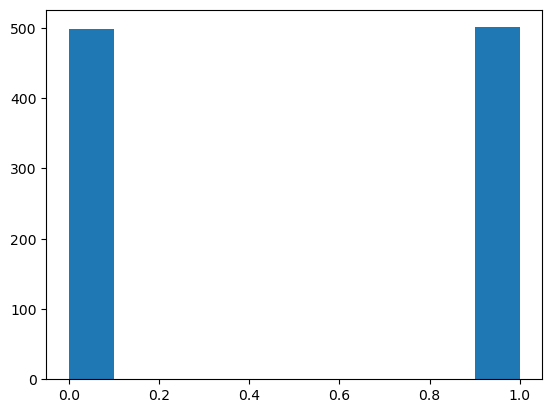

In [65]:
size = 1_000
results = np.random.randint(2,size = size)

plt.hist(results)
plt.show()

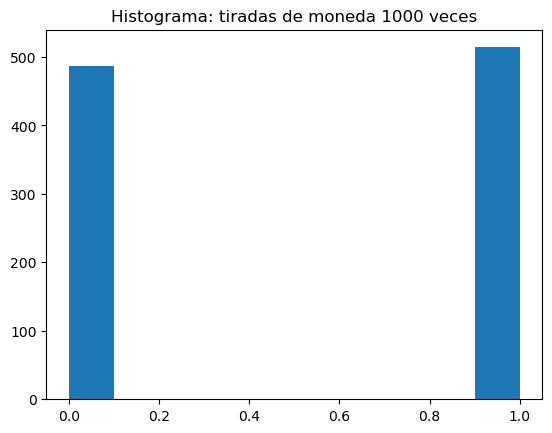

In [66]:
size = 1000
results = np.random.randint(2,size = size)

fig,ax = plt.subplots() 
ax.set_title(f"Histograma: tiradas de moneda {size} veces")
ax.hist(results)
plt.show()

Text(0.5, 1.0, 'Proporción de cecas(0) y caras(1)')

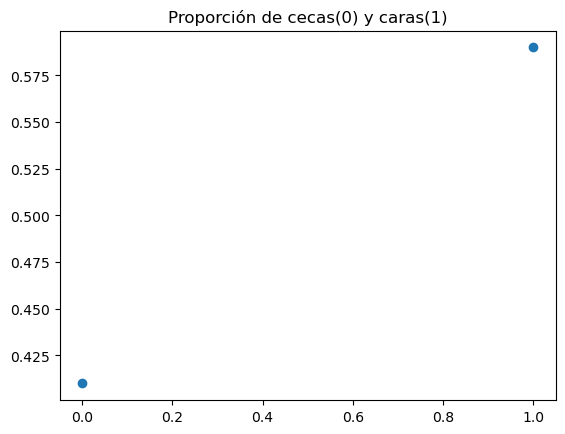

In [68]:
size = 100
results = np.random.randint(2,size = size)

x = np.unique(results) # array con los valores distintos que hay en "results". En este caso son dos: [0,1]
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = sum(results == x[i]) #me guarda cuantos 0s y cuantos 1s obtuve
y = y/len(results)
plt.scatter(x,y)
plt.title('Proporción de cecas(0) y caras(1)')

In [69]:
#Una función que haga lo mismo que arriba para una tira de resultados cualquiera
def aproximar_pmf(results):
    size = len(results)
    x = np.unique(results)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = sum(results == x[i])
    y = y/size
    # Ploteo
    fig,ax = plt.subplots() 
    ax.scatter(x,y)
    ax.set_ylim(0,1)
    ax.set_title(f"Aproximación de la pmf con {size} samples")
    plt.show()

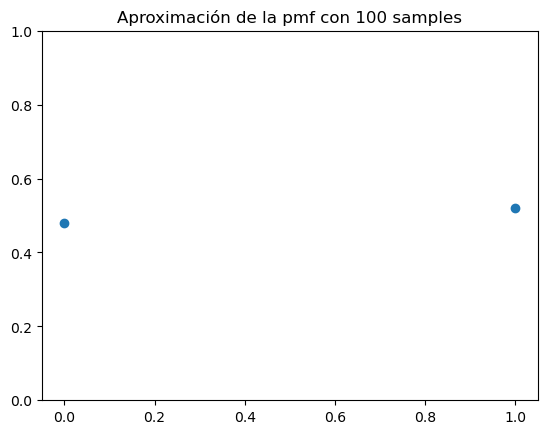

In [70]:
samples = np.random.randint(2,size = 100)
aproximar_pmf(samples)

Modelamos cada tirada de monedas como una *variable aleatoria* con **distribución Bernoulli**

$X \sim Bernoulli(p) $
experimento con dos resultados posibles: Éxito y Fracaso (cara y ceca)


$ X = 1 $ si éxito

$ X = 0 $ si fracaso


$P(E) = p$

$P(F) = P(E^{C}) = 1-p$

# Binomial

Repito varias veces un experimento de Bernoulli de forma independiente.

$X \sim Bi(n,p)$ es la cantidad de éxitos entre las n repeticiones


In [72]:
n = 3
p = 0.5
size = 10
samples = np.random.binomial(n, p, size)
print(samples)


[1 1 1 1 1 1 0 3 2 1]


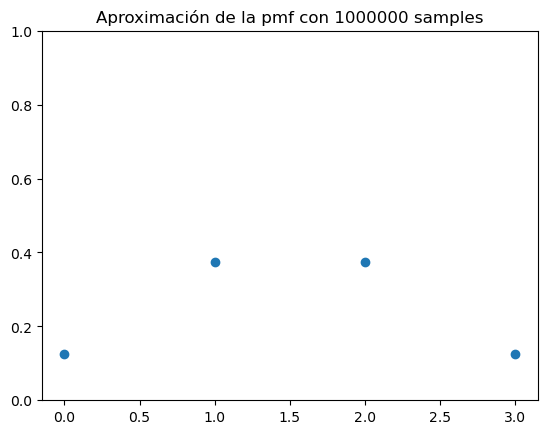

In [76]:
n, p, size = 3, 0.5, 1000000
samples =  np.random.binomial(n, p, size)
aproximar_pmf(samples)

In [77]:
from scipy.stats import binom
n, p = 3, 0.5
binomial = binom(n,p) # qué es esto?

In [78]:
binomial

$$ p_X(x;p,n) =  {n \choose x} p^{x}(1-p)^{n-x} $$

In [79]:
binomial.pmf(3)

0.125

[0 1 2 3]


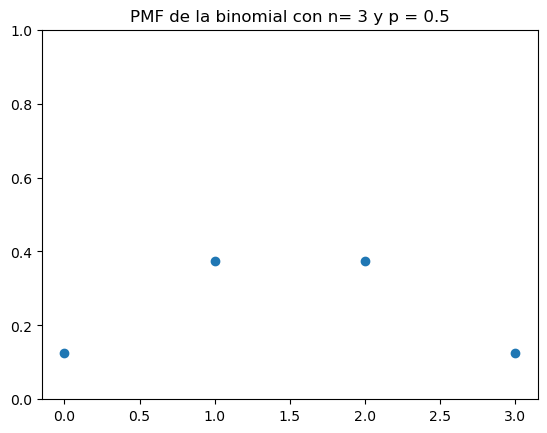

In [81]:
x = np.arange(4)
print(x)
plt.title(f"PMF de la binomial con n= {n} y p = {p}")
plt.scatter(x,binomial.pmf(x))
plt.ylim(0,1)
plt.show()

# Suma de Bernoullis

In [97]:
p = 0.5
binom(1,p).rvs([3,12]) # tirar una moneda

array([[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]])

In [98]:
N = 3 # N monedas
size = 10 # Cantidad de tiradas
p = 0.5 # la probabilidad de que salga cara 
threesample = binom(1,p).rvs([N,size])
print(threesample)


[[0 0 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 1]
 [1 1 1 0 1 0 1 1 1 0]]


In [22]:
sample = np.sum(threesample,axis = 0)
sample

array([1, 2, 1, 1, 2, 0, 1, 3, 1, 2])

[3 2 2 2 1 0 2 3 0 2 2 2 2 2 1 2 1 2 3 3 2 2 1 1 1 1 1 2 1 3 0 2 2 1 2 3 1
 2 1 2 2 2 1 1 0 2 1 1 2 2 2 2 1 1 2 1 0 1 2 0 2 3 1 1 0 1 1 3 0 1 1 1 2 1
 2 2 0 0 2 1 0 1 1 2 3 2 1 2 1 2 2 0 2 1 2 0 2 1 2 2 2 2 1 2 1 1 1 0 0 1 2
 3 2 2 2 1 1 2 2 0 2 1 2 2 2 1 2 2 2 1 1 0 2 2 3 2 1 1 2 1 2 0 0 3 1 1 2 2
 0 2 2 2 1 2 2 0 3 1 1 1 1 2 1 1 2 2 1 0 2 1 1 0 2 0 1 0 1 2 3 2 2 2 2 2 1
 1 1 1 2 3 2 0 1 2 1 2 2 0 3 2 1 2 1 2 1 2 3 0 0 1 3 2 1 1 2 2 2 0 2 3 1 2
 2 2 0 2 2 1 0 2 2 1 2 2 1 0 2 2 2 1 2 2 2 2 2 2 1 3 2 2 2 1 2 1 2 0 2 1 2
 1 3 1 2 2 2 2 2 2 2 3 1 3 1 0 1 2 1 1 1 2 3 1 0 1 1 1 1 2 1 1 1 1 2 3 3 1
 2 2 3 0 2 0 0 2 1 0 1 0 2 0 2 2 2 2 3 2 1 3 0 1 1 3 1 2 3 0 1 3 2 2 1 1 3
 2 1 1 1 2 2 3 1 2 1 2 0 2 2 2 1 1 2 2 1 2 1 2 3 1 1 2 2 1 0 1 0 1 2 2 3 2
 2 2 1 3 2 0 1 1 2 1 1 1 1 3 0 1 2 1 1 2 0 3 1 2 2 2 1 2 1 0 1 2 0 1 1 1 0
 2 1 1 1 1 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 2 1 3 1 1 2 3 3 1 2 1 1 3 1 1 1 1
 3 1 1 0 1 0 3 2 3 2 2 3 1 3 1 1 2 0 1 0 0 2 2 2 1 1 2 2 1 1 2 2 2 0 2 1 2
 3 3 2 2 1 1 3 1 2 1 1 1 

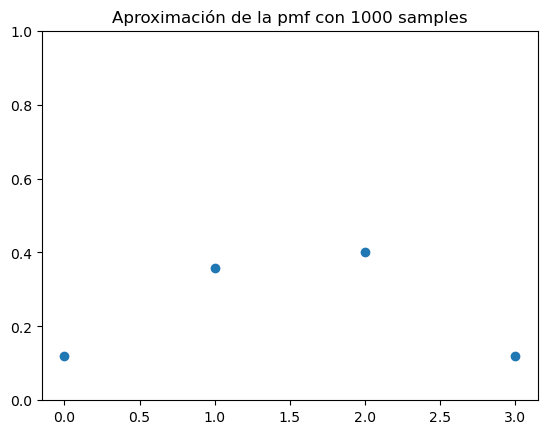

In [23]:
size = 1_000
threesample = binom(1,p).rvs([N,size])
sample = np.sum(threesample,axis = 0)
print(sample)
aproximar_pmf(sample)